In [1]:
import deeply
import deeply.datasets as dd

In [2]:
mnist, info = dd.load("mnist", with_info = True, shuffle_files = True, as_supervised = True)

In [4]:
input_shape    = info.features["image"].shape
x, y, channels = input_shape

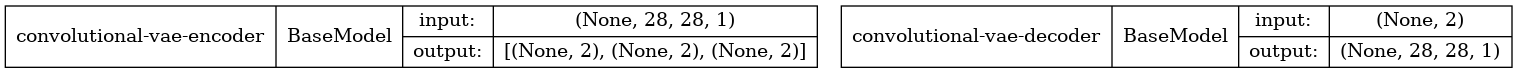

In [5]:
vae = deeply.hub("cvae", x = x, y = y, channels = channels)
vae.plot()

In [6]:
data = dd.concat([mnist["train"], mnist["test"]], mapper = lambda image, labels: image).batch(1)

In [7]:
vae.fit(data)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

TypeError: in user code:

    File "/usr/local/lib/python3.9/site-packages/keras/engine/training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.9/site-packages/keras/engine/training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.9/site-packages/keras/engine/training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "/deeply/src/deeply/model/vae.py", line 45, in train_step
        loss   = bernoulli_loss(data, y_pred)
    File "/deeply/src/deeply/losses/__init__.py", line 26, in bernoulli_loss
        return K.sum(K.binary_crossentropy(y_true, y_pred), axis = -1)
    File "/usr/local/lib/python3.9/site-packages/keras/backend.py", line 5158, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)

    TypeError: Input 'y' of 'Mul' Op has type uint8 that does not match type float32 of argument 'x'.
